# Условие

## HW2 - Token Ring
Задача состоит в построении простой модели доисторического сетевого протокола сети под названием TokenRing и исследовании его свойств.
  
Необходимо исследовать пропускную способность сети (throughput) и характерное время задержки (latency) в зависимости от количества узлов N и количества пакетов P (1...N), находящихся в транзите одновременно.
Дополнительно нужно попытаться оптимизировать (улучшить) throughput или latency как в целом так и для отдельно взятых конкретных режимов (недогруженная сеть, перегруженная сеть) и исследовать влияние оптимизаций для одного режима на весь спектр режимов. Описывете историю оптимизации.
 
Рисуете красивые графики, формулируете свои мысли в виде мини-статьи.
Сдаете рабочий код, статью.
 
Оценка будет зависить от

    1) корректности кода

    2) качества анализа результатов

    3) решения доп.задач

    4) оформления (кратко, четко, корректно, научный стиль)


# Отчёт

## Часть 1. Описание кода.

## Часть . Обработка результатов

In [410]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

Создадим переменную для хранения имени файла с данными.

In [411]:
name = '52314top8messnum1000rushtruesleepnanos10000010erfalsetok3'

Считываем файл с данными и дропаем нулевую (служебную) строчку с названием колонок

In [412]:
names = ['Created', 'Sent', 'Received', 'Returned']
data = pd.read_table("D:/Git/TokenRing/"+name+".txt", sep=' ', names=names)
print(data.head())
data = data.drop(data.index[0])

          Created            Sent        Received        Returned
0         created            sent        received        returned
1  72777204479849  72777213820267  72777215619454  72777217515918
2  72777204443258  72777222598440  72777222883133  72777224282054
3  72777205176409  72777236022727  72777236848692  72777237245834
4  72777204659232  72777240563530  72777240774149  72777242071777


## Data preparation

Приводим данные к числовому виду

In [413]:
data = data.apply(pd.to_numeric, errors='coerce')

Формируем переменные, к которым мы будем обращаться в дальнейшем.

In [414]:
wait_for_sending = data["Sent"] - data["Created"]
wait_for_receiving = data["Received"] - data["Created"]
circulated_before_receiving = data["Received"] - data["Sent"]
time = data["Created"] - min(data["Created"])

In [415]:
wait_for_returning = data["Returned"] - data["Created"]
circulated_before_return = data["Returned"] - data["Sent"]
min(wait_for_returning)

-72778229939763

На момент остановки программы часть сообщений ещё не вернулась.
Сформируем корректные переменные для времени возвращения.

In [416]:
not_returned = data.loc[data["Returned"].values==0].index
print "Not returned: " + str(len(not_returned))
circulated_before_return_good = circulated_before_return.drop(not_returned)
wait_for_returning_good = wait_for_returning.drop(not_returned)
time_good = time.drop(not_returned)

Not returned: 1


Для отчёта выводим медианные значения времени.

In [417]:
print "Median wait for sending: "+str(wait_for_sending.median())
print "Median wait for receiving: "+str(wait_for_receiving.median())
print "Median wait for returning: "+str(wait_for_returning_good.median())
print "Median circulation time: "+str(circulated_before_return_good.median())
print "Min circulation time: "+str(circulated_before_return.min())
print "Max circulation time: "+str(circulated_before_return.max())

Median wait for sending: 192783130.0
Median wait for receiving: 193333996.5
Median wait for returning: 193719983.0
Median circulation time: 932614.0
Min circulation time: -72778602448535
Max circulation time: 11166379


define function for plotting

In [418]:
def plotHist(label, dataset):
    f = plt.figure(figsize=(8, 6))
    plt.hist(dataset, bins=50)
    plt.title(label)
    plt.xlabel("time(nanos)")
    plt.ylabel("Frequency")
    plt.plot()

In [419]:
def plotScatter(label, dataset, timeset=time):
    f = plt.figure(figsize=(8, 6))
    plt.title(label)
    plt.ylabel("time(nanos)")
    plt.xlabel("program execution time (nanos)")
    plt.scatter(timeset, dataset)
    plt.plot()

# Sending

## Plot of wait for sending

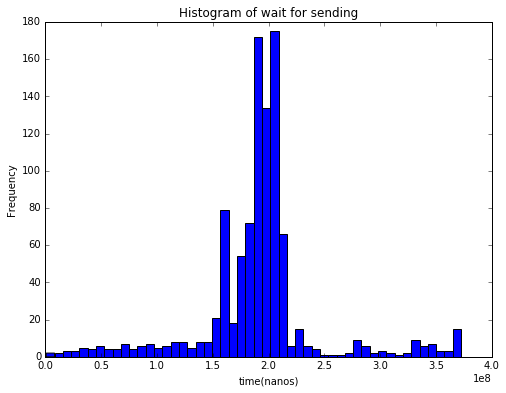

In [420]:
plotHist("Histogram of wait for sending", wait_for_sending)

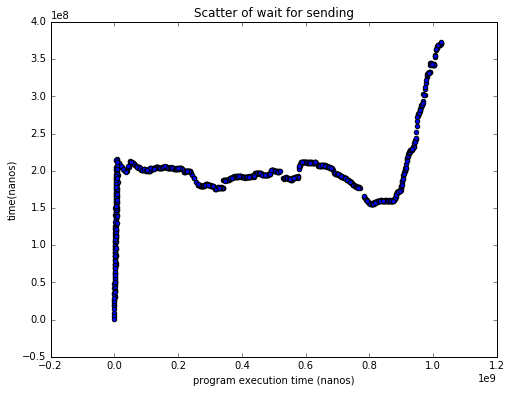

In [421]:
plotScatter("Scatter of wait for sending", wait_for_sending)

# Receiving

## Plot of wait for receiving

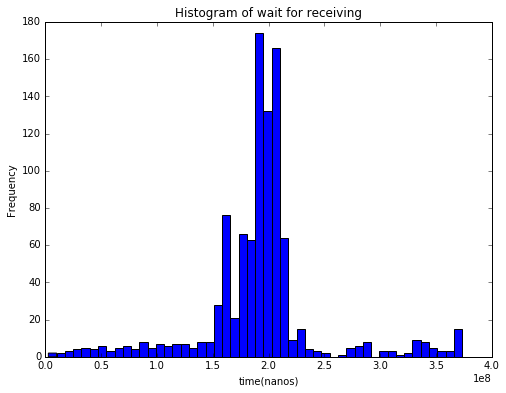

In [422]:
plotHist("Histogram of wait for receiving", wait_for_receiving)

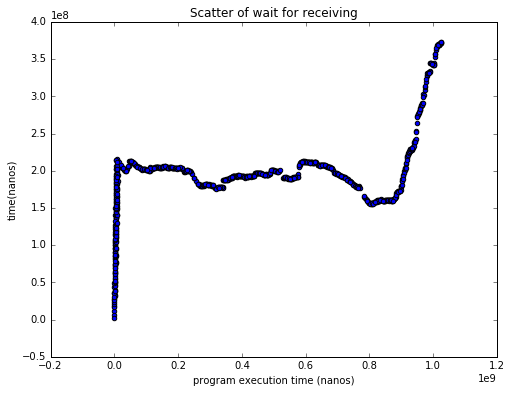

In [423]:
plotScatter("Scatter of wait for receiving", wait_for_receiving)

## Circulate before received

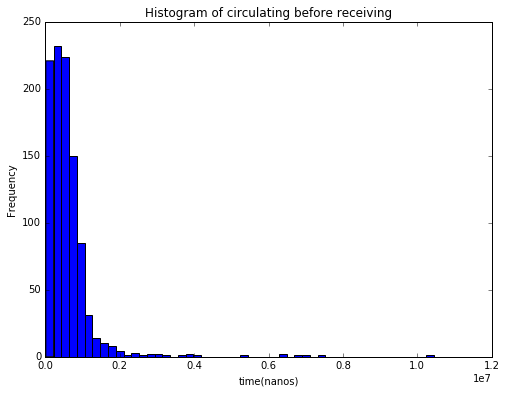

In [424]:
plotHist("Histogram of circulating before receiving", circulated_before_receiving)

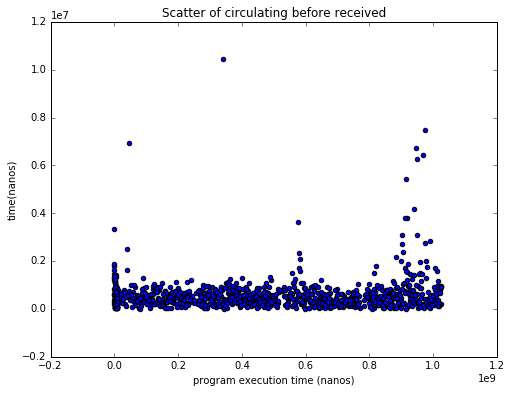

In [425]:
plotScatter("Scatter of circulating before received", circulated_before_receiving)

# Returning

## Plot of wait for returning

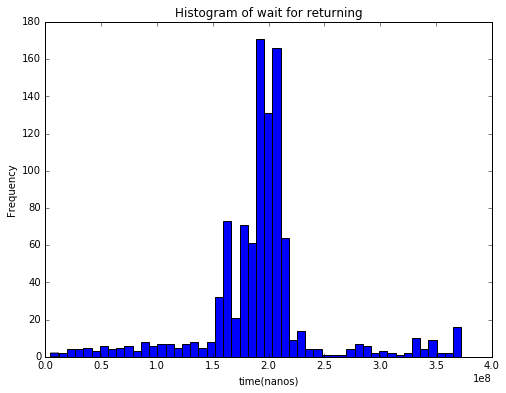

In [426]:
plotHist("Histogram of wait for returning", wait_for_returning_good)

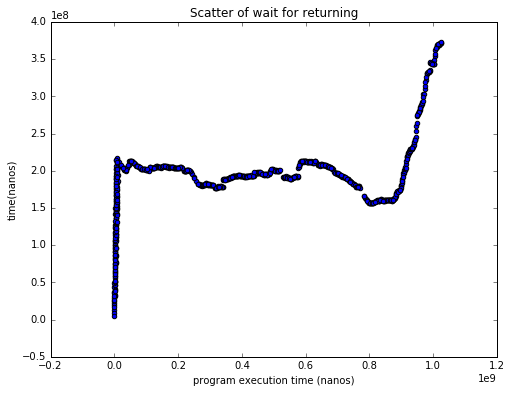

In [427]:
plotScatter("Scatter of wait for returning", wait_for_returning_good, time_good)

## Circulate before returned

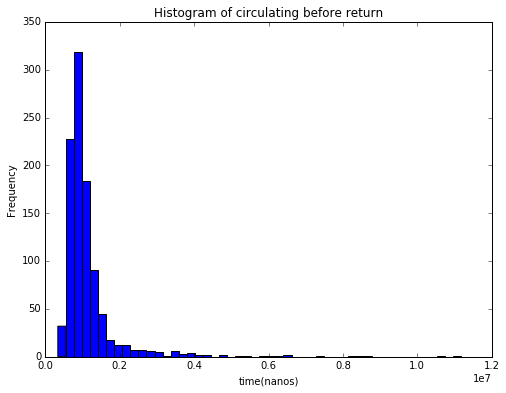

In [428]:
plotHist("Histogram of circulating before return", circulated_before_return_good)

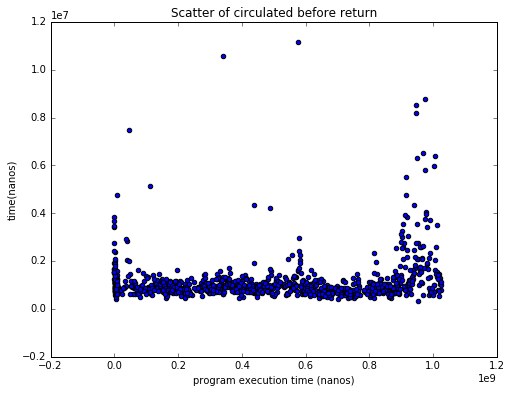

In [429]:
plotScatter("Scatter of circulated before return", circulated_before_return_good, time_good)